In [1]:
%matplotlib inline
# Dependencies
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
lat_lags = zip(lats, lngs)

In [4]:
#print coordinates from the zip lat/long file
coordinates = list(lat_lngs)
print(coordinates[:50])

[(-15.286980607789133, 91.58203482373216), (38.547011192878784, -5.8638754045986445), (53.20500952609058, -23.266727613760793), (48.33190613076303, -21.3072127012326), (-42.68081213808431, 102.74187194306717), (-3.0470580509700653, -134.30963261014), (-88.7751445007857, -63.16252933214663), (40.822200501053544, 50.75292705596078), (-41.23738576041544, -13.246435806456532), (10.019870053984292, 43.5095074104197), (-44.33483556162406, -43.77142354555437), (23.509563595702758, 150.1817843134652), (-32.66469988616174, -64.67813258324752), (-55.64643292997992, -120.0214234126536), (-38.45286542777083, 10.723626014836782), (-20.694734567090492, 158.1605220126276), (65.64325938356814, -121.74404531203805), (-38.88225502492199, -70.04072993196145), (31.098091533647434, 111.27573235410227), (-27.045204481422033, -45.81091028276967), (83.11572841337065, 71.78737529747366), (37.64408793885235, 169.94353025653692), (-20.66243769172209, -58.67437064139999), (-10.57342801698718, -96.77646850888188),

In [5]:
cities = list()

for x in coordinates:
    cities_name = citipy.nearest_city(x[0], x[1]).city_name
    if cities_name not in cities:
        cities.append(cities_name)
print(cities[:10],len(cities))

['bengkulu', 'azuaga', 'vestmannaeyjar', 'praia da vitoria', 'busselton', 'atuona', 'ushuaia', 'artyom', 'jamestown', 'borama'] 629


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e8b7b8ba89861889e4baf0d754ccb2c2


In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    city_weather = requests.get(city_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 2 of Set 1 | azuaga
Processing Record 3 of Set 1 | vestmannaeyjar
Processing Record 4 of Set 1 | praia da vitoria
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | artyom
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | borama
City not found. Skipping...
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | rio cuarto
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | poum
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | neuquen
Processing Record 19 of Set 1 | yichang
Processing Record 20 of Set 1 | porto belo
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1

Processing Record 33 of Set 4 | kieta
Processing Record 34 of Set 4 | shagonar
Processing Record 35 of Set 4 | hithadhoo
Processing Record 36 of Set 4 | tautira
Processing Record 37 of Set 4 | razdolinsk
Processing Record 38 of Set 4 | semporna
Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | nago
Processing Record 41 of Set 4 | sisimiut
Processing Record 42 of Set 4 | gigmoto
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | ugoofaaru
Processing Record 46 of Set 4 | monrovia
Processing Record 47 of Set 4 | arman
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | bere
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | puerto carreno
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | mumford
Processing Record 6 of Set 5 | i

Processing Record 19 of Set 8 | ano poroia
Processing Record 20 of Set 8 | craig
Processing Record 21 of Set 8 | madaoua
Processing Record 22 of Set 8 | urumqi
City not found. Skipping...
Processing Record 23 of Set 8 | mezen
Processing Record 24 of Set 8 | rovaniemi
Processing Record 25 of Set 8 | borkenes
Processing Record 26 of Set 8 | anadyr
Processing Record 27 of Set 8 | staryy nadym
Processing Record 28 of Set 8 | bintulu
Processing Record 29 of Set 8 | bukachacha
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | grootfontein
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | connersville
Processing Record 34 of Set 8 | ust-nera
Processing Record 35 of Set 8 | erenhot
Processing Record 36 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 37 of Set 8 | san cristobal
Processing Record 38 of Set 8 | souillac
Processing Record 39 of Set 8 | vaitape
Processing Record 40 of Set 8 | rorvik
Processing Record 41 of Se

Processing Record 6 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 7 of Set 12 | linhares
Processing Record 8 of Set 12 | sao felix do xingu
Processing Record 9 of Set 12 | lagoa
Processing Record 10 of Set 12 | kavaratti
Processing Record 11 of Set 12 | kyshtovka
Processing Record 12 of Set 12 | kovvur
Processing Record 13 of Set 12 | kolobrzeg
Processing Record 14 of Set 12 | lethem
Processing Record 15 of Set 12 | midleton
Processing Record 16 of Set 12 | bone
Processing Record 17 of Set 12 | saldanha
Processing Record 18 of Set 12 | rucphen
Processing Record 19 of Set 12 | lamar
Processing Record 20 of Set 12 | belozerskoye
Processing Record 21 of Set 12 | olinda
Processing Record 22 of Set 12 | jaru
Processing Record 23 of Set 12 | kuche
City not found. Skipping...
Processing Record 24 of Set 12 | butembo
Processing Record 25 of Set 12 | pochinki
Processing Record 26 of Set 12 | chirongui
Processing Record 27 of Set 12 | tongren
Processing Record 28

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Azuaga,38.26,-5.68,39.99,91,0,4.00,ES,2020-01-04 02:09:08
1,Vestmannaeyjar,63.44,-20.27,33.89,71,100,37.31,IS,2020-01-04 02:09:08
2,Praia Da Vitoria,38.73,-27.07,55.40,82,75,17.60,PT,2020-01-04 02:09:09
3,Busselton,-33.64,115.35,73.00,22,26,2.39,AU,2020-01-04 02:09:07
4,Atuona,-9.80,-139.03,80.44,73,0,15.73,PF,2020-01-04 02:09:09
5,Ushuaia,-54.81,-68.31,48.20,70,75,14.99,AR,2020-01-04 02:09:09
6,Artyom,43.36,132.19,15.80,61,0,2.24,RU,2020-01-04 02:09:09
7,Jamestown,-33.21,138.60,77.76,42,0,19.73,AU,2020-01-04 02:09:08
8,Chuy,-33.69,-53.46,65.28,82,0,7.96,UY,2020-01-04 02:09:10
9,Katsuura,33.93,134.50,57.00,53,40,9.17,JP,2020-01-04 02:09:10


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10) 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Azuaga,ES,2020-01-04 02:09:08,38.26,-5.68,39.99,91,0,4.00
1,Vestmannaeyjar,IS,2020-01-04 02:09:08,63.44,-20.27,33.89,71,100,37.31
2,Praia Da Vitoria,PT,2020-01-04 02:09:09,38.73,-27.07,55.40,82,75,17.60
3,Busselton,AU,2020-01-04 02:09:07,-33.64,115.35,73.00,22,26,2.39
4,Atuona,PF,2020-01-04 02:09:09,-9.80,-139.03,80.44,73,0,15.73
5,Ushuaia,AR,2020-01-04 02:09:09,-54.81,-68.31,48.20,70,75,14.99
6,Artyom,RU,2020-01-04 02:09:09,43.36,132.19,15.80,61,0,2.24
7,Jamestown,AU,2020-01-04 02:09:08,-33.21,138.60,77.76,42,0,19.73
8,Chuy,UY,2020-01-04 02:09:10,-33.69,-53.46,65.28,82,0,7.96
9,Katsuura,JP,2020-01-04 02:09:10,33.93,134.50,57.00,53,40,9.17


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578103966.3149514

In [14]:
today = time.strftime("%x")
today

'01/03/20'

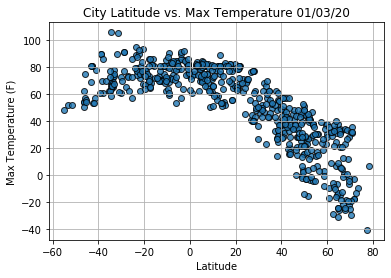

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

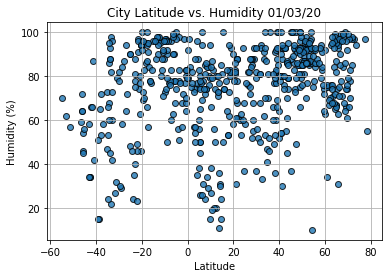

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

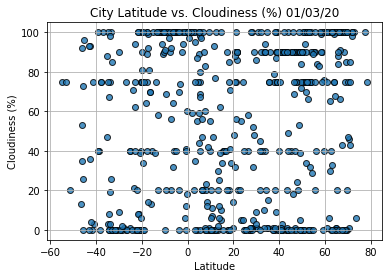

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

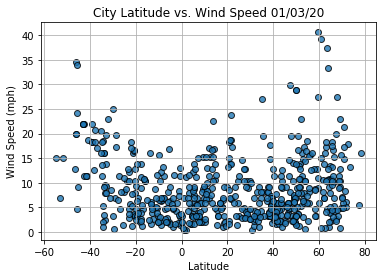

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Azuaga,ES,2020-01-04 02:09:08,38.26,-5.68,39.99,91,0,4.00
1,Vestmannaeyjar,IS,2020-01-04 02:09:08,63.44,-20.27,33.89,71,100,37.31
2,Praia Da Vitoria,PT,2020-01-04 02:09:09,38.73,-27.07,55.40,82,75,17.60
6,Artyom,RU,2020-01-04 02:09:09,43.36,132.19,15.80,61,0,2.24
9,Katsuura,JP,2020-01-04 02:09:10,33.93,134.50,57.00,53,40,9.17
...,...,...,...,...,...,...,...,...,...
563,Carora,VE,2020-01-04 02:11:11,10.17,-70.08,65.77,84,20,2.57
564,Igrim,RU,2020-01-04 02:11:11,63.19,64.42,21.72,95,100,10.29
565,Nyurba,RU,2020-01-04 02:11:11,63.29,118.35,-9.92,98,100,4.09
566,Totness,US,2020-01-04 02:11:12,33.74,-80.80,69.80,100,90,5.82


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

Linear Regression on the Northern Hemisphere for % Humidity


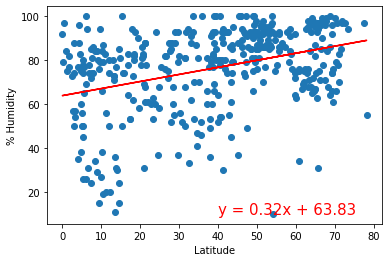

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, print('Linear Regression on the Northern Hemisphere for % Humidity'), '% Humidity',(40,10))

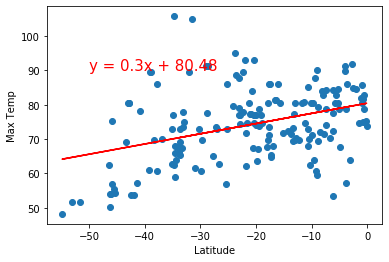

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

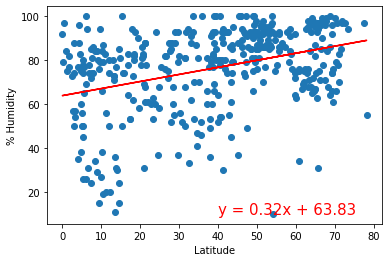

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

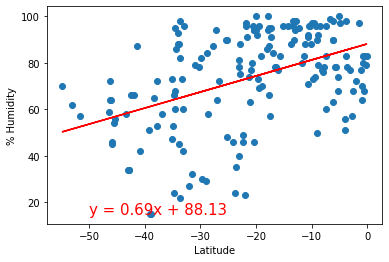

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

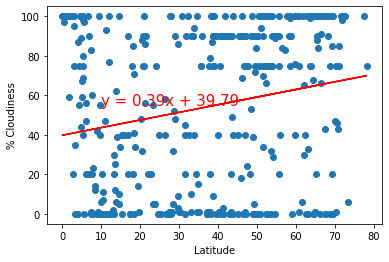

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

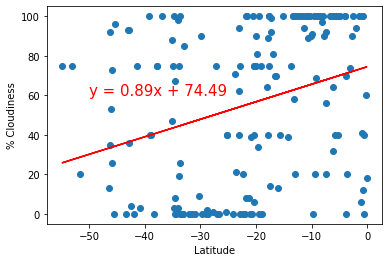

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

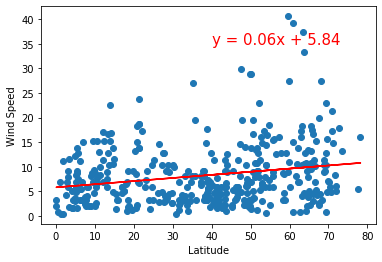

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

Linear Regression on the Southern Hemisphere for Wind Speed


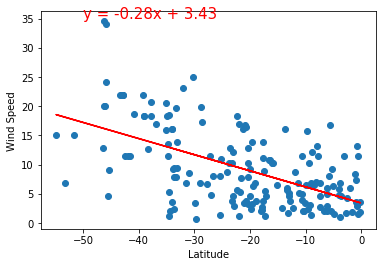

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       print('Linear Regression on the Southern Hemisphere for Wind Speed'), 'Wind Speed',(-50,35))